In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("Snp 500 Daily 1928.csv")

In [2]:
date=list(df["Date"])
price=list(df["Close"])

yr=range(1928,2021,1)

# Biggest Down & Biggest Up Days

In [3]:
pr=np.array(price)
prt=(pr[1:]-pr[0:-1])/pr[0:-1]*100

x=dict(zip(date[1:],prt))

import operator
s1=sorted(x.items(), key=operator.itemgetter(1))
down=pd.DataFrame(s1[0:40])

s2=sorted(x.items(), key=operator.itemgetter(1), reverse=True)
up=pd.DataFrame(s2[0:40])

In [4]:
#print( up ,'\n\n', down )

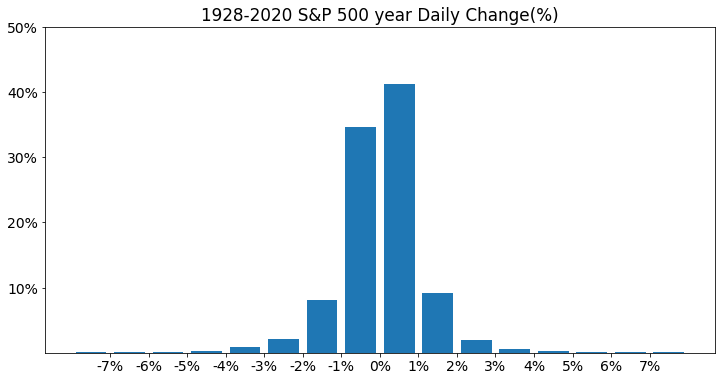

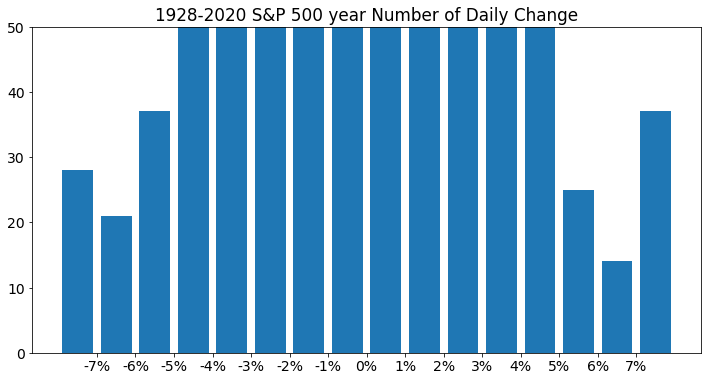

-1% ~ 1% 75.79416045894341 %
-2% ~ 2% 93.14581727887662 %
-3% ~ 3% 97.2300710677284 %
-4% ~ 4% 98.67283157804606 %
10812.0 12545.0


In [9]:
p=np.zeros(16)
q=np.arange(-7.5,8.5,1)

for val in prt:
    if val < -7:
        p[0]+=1
    elif val < -6:
        p[1]+=1
    elif val < -5:
        p[2]+=1
    elif val < -4:
        p[3]+=1
    elif val < -3:
        p[4]+=1
    elif val < -2:
        p[5]+=1
    elif val < -1:
        p[6]+=1
    elif val < 0:
        p[7]+=1
    elif val < 1:
        p[8]+=1
    elif val < 2:
        p[9]+=1
    elif val < 3:
        p[10]+=1
    elif val < 4:
        p[11]+=1
    elif val < 5:
        p[12]+=1
    elif val < 6:
        p[13]+=1
    elif val < 7:
        p[14]+=1
    else:
        p[15]+=1
        
p=p/len(date)

plt.figure(figsize=(12,6))
plt.bar(q,p)
plt.title('1928-2020 S&P 500 year Daily Change(%)')
plt.xticks([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7], labels=["-7%","-6%","-5%","-4%","-3%","-2%","-1%","0%","1%","2%","3%","4%","5%","6%","7%"])
plt.yticks([0.1,0.2,0.3,0.4,0.5], labels=["10%","20%","30%","40%","50%" ])

plt.rc('font', size=14) 
plt.show()

plt.figure(figsize=(12,6))
plt.bar(q,p*len(date))
plt.title('1928-2020 S&P 500 year Number of Daily Change')
plt.xticks([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7], labels=["-7%","-6%","-5%","-4%","-3%","-2%","-1%","0%","1%","2%","3%","4%","5%","6%","7%"])
#plt.yticks([0, 0.25, 0.5, 0.75, 1], labels=["0%","0.25%", "0.5%","0.75%", "1%"])
plt.ylim(0.0, 50)
plt.rc('font', size=14) 
plt.show()

df=pd.DataFrame(p*100,q)

print("-1% ~ 1%", (p[7]+p[8])*100,"%" )
print("-2% ~ 2%", (p[6]+p[7]+p[8]+p[9])*100,"%" )
print("-3% ~ 3%", (p[5]+p[6]+p[7]+p[8]+p[9]+p[10])*100,"%" )
print("-4% ~ 4%", (p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11])*100,"%" )

print(sum(p[:8])*len(date), sum(p[8:])*len(date))

# Calculate Number of Days

In [ ]:
ytr=1928
k=0

ar=list()

for i in range(len(date)):
    tmp=int(date[i][0:4])
    
    if tmp == ytr:
        k+=1
    else:
        k+=1
    
        ar.append(k)
        ytr+=1
            
        k=0

In [ ]:
nar=list()

for i in range(len(ar)+1):
    nar.append(sum(ar[0:i]))

# Extract data for each year

In [ ]:
for i in range(len(ar)+1):
    
    if i == len(ar):
        ijk=int(nar[i])

    else:
        
        ix1=int(nar[i])
        ix2=int(nar[i+1])

In [ ]:
for i in range(len(ar)+1):
    dp='price'+str(1928+i)
    dt='date'+str(1928+i)
    
    if i == len(ar):
        ix=int(nar[i])
        globals()[dp]=price[ix-1:]
        globals()[dt]=date[ix-1:]
    else:
        
        ix1=int(nar[i])
        ix2=int(nar[i+1])
        globals()[dp]=price[ix1:ix2-1]#date[0:250]
        globals()[dt]=date[ix1:ix2-1]

# Data Classification ( -6 % ~ +6 % )

In [ ]:
clas=[1929,1930,1931,1932,1933,1987,1995,2008,2020]

In [ ]:

q=np.arange(-6.5,7.5,1)

surf=[]

#for st in range(1928,2021):

for st in clas:
    
    print(st)
    
    p=np.zeros(14)
    
    x=[]

    qq= globals()['price'+str(st)]
    
    for i in range(len( qq)-1):
        x.append ( (qq[i+1]-qq[i])/qq[i]*100)

    for val in x:
        

        if val < -6:
            p[0]+=1
        elif val < -5:
            p[1]+=1
        elif val < -4:
            p[2]+=1
        elif val < -3:
            p[3]+=1
        elif val < -2:
            p[4]+=1
        elif val < -1:
            p[5]+=1
        elif val < 0:
            p[6]+=1
        elif val < 1:
            p[7]+=1
        elif val < 2:
            p[8]+=1
        elif val < 3:
            p[9]+=1
        elif val < 4:
            p[10]+=1
        elif val < 5:
            p[11]+=1
        elif val < 6:
            p[12]+=1
        else:
            p[13]+=1
    
    tmp=p.copy()
    p=p/sum(p)
    
    surf.append(p)
    
    xx=[2.5,3.5,4.5,5.5,6.5]
    yy=[tmp[4]+tmp[9],tmp[3]+tmp[10],tmp[2]+tmp[11],tmp[1]+tmp[12],tmp[0]+tmp[13] ]
    

    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.bar(q,tmp)
    plt.title(str(st)+' S&P 500 year Daily Variation')
    plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6], labels=["-6%","-5%","-4%","-3%","-2%","-1%","0%","1%","2%","3%","4%","5%","6%"])

    plt.rc('font', size=14) 
    #plt.show()

    #plt.figure(figsize=(9,4))
    plt.subplot(1,2,2)
    plt.bar(xx,yy)
    plt.title(str(st)+' S&P 500 year Daily Up and Down Variation')
    plt.xticks([2,3,4,5,6], labels=["2%<","3%<","4%<","5%<","6%<"])

    plt.rc('font', size=14) 
    plt.ylim(0,45)
    plt.show()
    
    print(tmp)
    print(yy)
    
surf=np.array(surf)

#plt.figure(figsize=(12,12))
#plt.imshow(X,Y,surf)
#plt.contourf(X,Y,surf,13,cmap='gist_rainbow')
#plt.colorbar()
#plt.show()

In [ ]:
# year=1958

# plt.figure(figsize=(8,4))
# plt.bar(q,surf[year-1928])
# plt.title(str(year)+' S&P 500 year Daily Change(%)')
# plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6], labels=["-6%","-5%","-4%","-3%","-2%","-1%","0%","1%","2%","3%","4%","5%","6%"])
# plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6], labels=["10%","20%","30%","40%","50%","60%"])
# plt.ylim(0.0, 0.6)
# plt.rc('font', size=14) 
# plt.show()


In [ ]:
# from mpl_toolkits import mplot3d

# year=np.arange(1928,2021)
# surf=np.array(surf)
# X,Y= np.meshgrid(q,year)

# plt.figure(figsize=(12,12))
# plt.contourf(X, Y, surf)
# plt.colorbar()
# plt.show()


# Data Classification ( abs percent )

In [ ]:
#for st in range(1928,2021):

for st in clas:
        
    x=[]

    qq= globals()['price'+str(st)]
    
    for i in range(len( qq)-1):
        x.append ( (qq[i+1]-qq[i])/qq[i]*100)


    k0=0; k1=0; k2=0; k3=0; k4=0; k5=0; k6=0;
    
    for val in x:

        if abs(val) > 6:
            k6+=1
        elif abs(val) > 5:
            k5+=1    
        elif abs(val) > 4:
            k4+=1
        elif abs(val) > 3:
            k3+=1
        elif abs(val) > 2:
            k2+=1
        elif abs(val) > 1:
            k1+=1
        else:
            k0+=1
        
    p1=[2,3,4,5,6]
    p2=[k2,k3,k4,k5,k6]

    su=k0+k1+k2+k3+k4+k5+k6
    
    plt.bar(p1,p2)
    plt.title(str(st)+' year S&P 500 Daily Up and Down Change (%) ',fontsize=12)
    plt.xticks(p1,labels=['2%<','3%<','4%<','5%<','6%<'])
    plt.rc('font',size=14)
    plt.show()
    print(k2,k3,k4,k5,k6, su)

In [ ]:
yrs=1931

plt.figure(figsize=(10,6))
plt.plot(globals()['date'+str(yrs)], globals()['price'+str(yrs)] )
plt.xticks(globals()['date'+str(yrs)][::22],labels=globals()['date'+str(yrs)][::22], rotation=60)
plt.rc('font',size=12)
plt.title(str(yrs)+' S&P 500 Index')
plt.show()

# Divide

In [ ]:
year=np.zeros(93)

for i in range(93):
    for j in range(len(date)):    
    
        k=1928+i
        if str(k) in date[j]:
            year[i]+=1

In [ ]:
sr_ix=[]
sr_date=[]

for i in range(len(year)-1):
    ix=int(np.sum(year[:i]))
    
    sr_ix.append(ix)
    sr_date.append(date[ix])

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(date,price)
plt.xticks(sr_ix[::4], sr_date[::4],rotation=60)
plt.yscale('log')
plt.title('1928 - 2020 S&P 500 Index')
plt.rc('font',size=12)
plt.yticks([10,30,100,300,700,1000,2000,3000,3500],labels=['10','30','100','300','1,000','2,000','3,000','3,500'])
plt.show()

In [ ]:
da1=date1930+date1931+date1932+date1933+date1934
pr1=price1930+price1931+price1932+price1933+price1934


plt.figure(figsize=(12,6))
plt.title('1930 - 1934 S&P 500 Index')
plt.plot(da1,pr1)
plt.xticks(da1[::40], da1[::40],rotation=60)

plt.show()

In [ ]:
# #da1=date1930+date1931+date1932+date1933+date1934+date1935+date1936+date1937+date1938
# #pr1=price1930+price1931+price1932+price1933+price1934+price1935+price1936+price1937+price1938

# da1=date1930+date1931+date1932+date1933+date1934+date1935+date1936+date1937+date1938+date1939+date1940
# pr1=price1930+price1931+price1932+price1933+price1934+price1935+price1936+price1937+price1938+price1939+price1940


# plt.figure(figsize=(12,12))
# plt.plot(da1,pr1)
# plt.xticks(da1[::60], da1[::60],rotation=60)

# plt.show()

In [ ]:
(3723./17.76)**(1./93)-1